In [8]:
"""
EasyLM Complete Demonstration
==============================
Dataset: CarDekho Vehicle Dataset (car details.csv)

Demonstrates EasyLM core capabilities:
1. Fit multiple linear regression models
2. Generate R-style summaries
3. Compare models using metrics and coefficients
4. Visualize comparisons
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from sklearn.preprocessing import StandardScaler

# import EasyLM
sys.path.insert(0, os.path.abspath('..'))
from EasyLM import LinearModel, ModelComparator, PlotHelper


# STEP 1: load data
def load_data():
    """Load dataset."""
    print("="*80)
    print("STEP 1: LOAD DATA")
    print("="*80)

    df = pd.read_csv("car details.csv")
    print(f"Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    return df


# STEP 2: preprocess data
def preprocess_data(df):
    """Clean and encode dataset."""
    print("\n" + "="*80)
    print("STEP 2: PREPROCESS DATA")
    print("="*80)

    df = df.dropna()

    if "year" in df:
        df["age"] = 2024 - df["year"]

    if df["km_driven"].dtype == "object":
        df["km_driven"] = df["km_driven"].str.replace(" km", "").str.replace(",", "").astype(float)

    if df["selling_price"].dtype == "object":
        df["selling_price"] = df["selling_price"].str.replace("₹", "").str.replace(",", "").astype(float)

    categorical = ["fuel", "seller_type", "transmission", "owner"]
    for col in categorical:
        if col in df:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat([df, dummies], axis=1).drop(col, axis=1)

    non_numeric = df.select_dtypes(include=["object"]).columns
    if len(non_numeric) > 0:
        df = df.drop(non_numeric, axis=1)

    print(f"Cleaned shape: {df.shape}")
    return df


# STEP 3: prepare features
def prepare_features(df):
    """Set target and feature sets."""
    print("\n" + "="*80)
    print("STEP 3: PREPARE FEATURES")
    print("="*80)

    y = df["selling_price"].values

    fuel = [c for c in df if c.startswith("fuel_")]
    seller = [c for c in df if c.startswith("seller_")]
    trans = [c for c in df if c.startswith("trans_")]
    owner = [c for c in df if c.startswith("owner_")]

    all_cat = fuel + seller + trans + owner

    feature_sets = {
        "model1": ["km_driven"],
        "model2": ["km_driven", "age"],
        "model3": ["km_driven", "age"] + fuel,
        "model4": ["km_driven", "age"] + all_cat
    }

    return y, feature_sets, df


# STEP 4: fit models
def fit_all_models(df, y, feature_sets):
    """Fit four nested models."""
    print("\n" + "="*80)
    print("STEP 4: FIT MODELS")
    print("="*80)

    models = []
    scaler = StandardScaler()

    names = [
        "Model 1: Simple (KM)",
        "Model 2: Basic (KM+Age)",
        "Model 3: Intermediate (+Fuel)",
        "Model 4: Full (All Features)"
    ]

    for key, name in zip(feature_sets, names):
        X = df[feature_sets[key]].values
        Xs = scaler.fit_transform(X)

        model = LinearModel(add_intercept=True)
        model.fit(Xs, y)
        model.name = name

        print(f"{name}: R²={model.r_squared():.4f}, AIC={model.aic():.2f}, BIC={model.bic():.2f}")
        models.append(model)

    return models


# STEP 5: show summaries
def show_individual_summaries(models):
    """Print summaries."""
    print("\n" + "="*80)
    print("STEP 5: SUMMARIES")
    print("="*80)

    for m in models:
        print("\n" + "="*80)
        print(m.name)
        print("="*80)
        print(m.summary())


# STEP 6: compare metrics
def compare_metrics(models):
    """Compare models using AIC/BIC and R²."""
    print("\n" + "="*80)
    print("STEP 6: METRIC COMPARISON")
    print("="*80)

    comparator = ModelComparator(models)
    df = comparator.compare()
    print(df)

    best_bic = df["bic"].idxmin()
    best_model = {m.name: m for m in models}[best_bic]

    return df, comparator, best_model


# STEP 7: compare coefficients
def compare_coefficients(comparator):
    """Compare coefficient values across models."""
    print("\n" + "="*80)
    print("STEP 7: COEFFICIENTS")
    print("="*80)

    print(comparator.coef_table())


# STEP 8: coefficient plots
def visualize_coefficients(models):
    """Plot coefficient comparisons."""
    print("\n" + "="*80)
    print("STEP 8: COEFFICIENT PLOTS")
    print("="*80)

    PlotHelper.coef_plot(*models, style="bar")
    plt.show()

    PlotHelper.coef_plot(*models, style="heatmap")
    plt.show()

    PlotHelper.coef_ci_plot(*models)
    plt.show()


# STEP 9: metric plots
def visualize_metrics(models):
    """Plot model metrics."""
    print("\n" + "="*80)
    print("STEP 9: METRIC PLOTS")
    print("="*80)

    PlotHelper.metric_plot(*models, style="bar")
    plt.show()

    PlotHelper.metric_plot(*models, style="radar")
    plt.show()

    PlotHelper.metric_plot(*models, style="heatmap")
    plt.show()


# STEP 10: dashboard
def show_dashboard(models):
    """Full comparison dashboard."""
    print("\n" + "="*80)
    print("STEP 10: DASHBOARD")
    print("="*80)

    PlotHelper.compare(*models)
    plt.show()


# STEP 11: final output
def final_recommendations(models, comparison_df, best_model):
    """Final model selection summary."""
    print("\n" + "="*80)
    print("STEP 11: FINAL SUMMARY")
    print("="*80)

    for m in models:
        print(f"{m.name}: R²={m.r_squared():.4f}, AIC={m.aic():.1f}, BIC={m.bic():.1f}")

    print(f"\nRecommended model: {best_model.name}")

STEP 1: LOAD DATA
Loaded: 4340 rows, 8 columns

STEP 2: PREPROCESS DATA
Cleaned shape: (4340, 15)

STEP 3: PREPARE FEATURES

STEP 4: FIT MODELS
Model 1: Simple (KM): R²=0.0370, AIC=115008.14, BIC=115020.89
Model 2: Basic (KM+Age): R²=0.1717, AIC=114355.82, BIC=114374.95
Model 3: Intermediate (+Fuel): R²=0.2401, AIC=113990.25, BIC=114034.88
Model 4: Full (All Features): R²=0.2639, AIC=113863.93, BIC=113946.81

STEP 5: SUMMARIES

Model 1: Simple (KM)
Call: EasyLM LinearModel

Observations: 4340
Parameters: 2
Degrees of Freedom (resid): 4338

Coefficients:
         Coef.  Std.Err.  t value  Pr(>|t|)
0  504127.3118 8619.1400  58.4893    0.0000
1 -111235.5268 8619.1400 -12.9056    0.0000

Residual variance (sigma^2): 322416752701.7704
R-squared: 0.0370
AIC: 115008.1404
BIC: 115020.8917

Model 2: Basic (KM+Age)
Call: EasyLM LinearModel

Observations: 4340
Parameters: 3
Degrees of Freedom (resid): 4337

Coefficients:
         Coef.  Std.Err.  t value  Pr(>|t|)
0  504127.3118 7994.2180  63.061

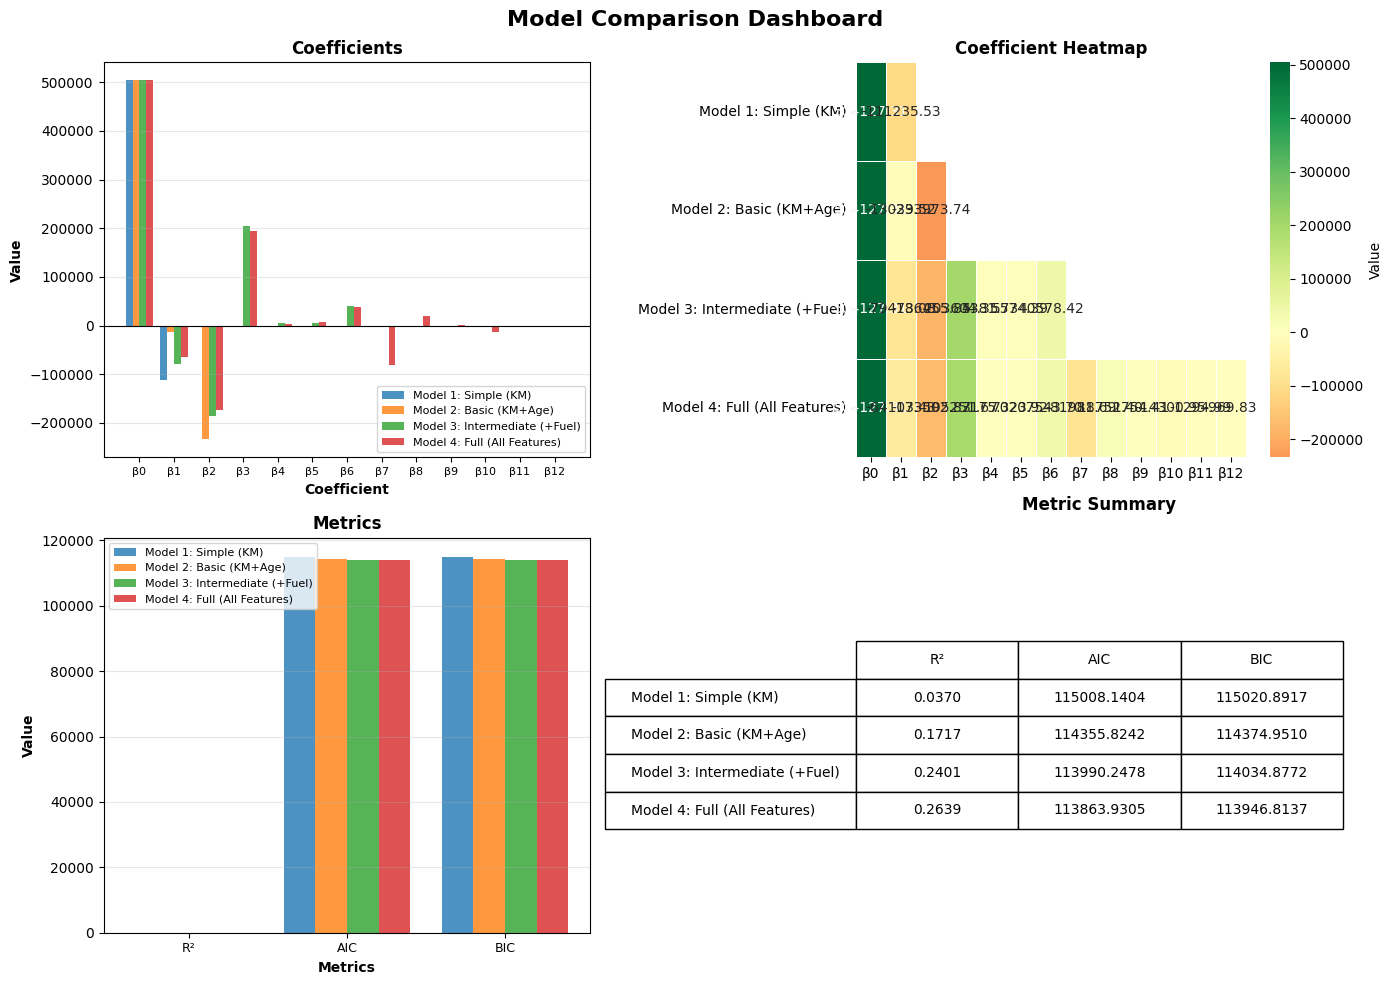


STEP 11: FINAL SUMMARY
Model 1: Simple (KM): R²=0.0370, AIC=115008.1, BIC=115020.9
Model 2: Basic (KM+Age): R²=0.1717, AIC=114355.8, BIC=114375.0
Model 3: Intermediate (+Fuel): R²=0.2401, AIC=113990.2, BIC=114034.9
Model 4: Full (All Features): R²=0.2639, AIC=113863.9, BIC=113946.8

Recommended model: Model 4: Full (All Features)

Done.


In [9]:

# MAIN
if __name__ == "__main__":
    df_raw = load_data()
    df_clean = preprocess_data(df_raw)
    y, feature_sets, df_clean = prepare_features(df_clean)

    models = fit_all_models(df_clean, y, feature_sets)
    show_individual_summaries(models)

    cmp_df, cmp, best = compare_metrics(models)
    compare_coefficients(cmp)

    #visualize_coefficients(models)
    #visualize_metrics(models)
    show_dashboard(models)

    final_recommendations(models, cmp_df, best)

    print("\nDone.")
